## Final Project

Satisfaction Prediction of Airline Passengers

## Team Elite:

Anantha Sai Ram Padala

Ashish Miyapuram

Jayachandra Yedlapalli

## Description:

In this project, we aim to develop a machine learning model that can accurately classify the satisfaction of air passengers based on their reviews. With the increasing use of online platforms for booking flights and sharing travel experiences, it has become crucial for airlines to understand and analyze customer feedback to improve their services.

We have collected a dataset of customer reviews from various airlines and will pre-process the data by removing noise and irrelevant information. The pre-processed data will be used to develop a classification model using different techniques such as Decision Trees, Random Forest, Support Vector Machines, Naive Bayes, Gradient Boosted Trees and Logistic Regression.

## Process:

In [1]:
#Required Imports:
import findspark`
from pyspark.sql import SparkSession

In [2]:
# create a SparkSession
spark = SparkSession.builder.appName("ImportData").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/04/29 09:21:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
#We will import the train.csv as df which will act as a SparkDataFrame
df = spark.read.csv("train.csv", header=True, inferSchema=True)

# display the contents of the DataFrame
df.show()

+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+
|_c0|    id|Gender|    Customer Type|Age| Type of Travel|   Class|Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|Arrival Delay in Minutes|        satisfaction|
+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+-

23/04/29 09:21:50 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction
 Schema: _c0, id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction
Expected: _c0 but found: 
CSV file: file:///Users/ananthpadala/Downloads/

We can see that Data is displayed in a clumsy manner. We can convert this into a Pandas DataFrame and display the output which would be in a clear and well structered manner. 

In [4]:
pandas_df = df.toPandas()

# display the Pandas DataFrame
pandas_df

23/04/29 09:21:57 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction
 Schema: _c0, id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction
Expected: _c0 but found: 
CSV file: file:///Users/ananthpadala/Downloads/

,_c0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


We can clearly see the strucutred data using Pandas DataFrame.

## Data Description:

In [5]:
# Get the length of the DataFrame
length = df.count()

# display the length
print("Length of DataFrame:", length)

Length of DataFrame: 103904


In [6]:
#We will create a Temperory View to utilize any of the SparkSQL logics for our data description or Further Analysis.

df.createOrReplaceTempView("Air_Passengers_Satisfaction")

In [7]:
# Let us see the schema of our Air_Passengers_Satisfaction Data:

spark.sql("DESCRIBE Air_Passengers_Satisfaction").show()

+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|                 _c0|      int|   null|
|                  id|      int|   null|
|              Gender|   string|   null|
|       Customer Type|   string|   null|
|                 Age|      int|   null|
|      Type of Travel|   string|   null|
|               Class|   string|   null|
|     Flight Distance|      int|   null|
|Inflight wifi ser...|      int|   null|
|Departure/Arrival...|      int|   null|
|Ease of Online bo...|      int|   null|
|       Gate location|      int|   null|
|      Food and drink|      int|   null|
|     Online boarding|      int|   null|
|        Seat comfort|      int|   null|
|Inflight entertai...|      int|   null|
|    On-board service|      int|   null|
|    Leg room service|      int|   null|
|    Baggage handling|      int|   null|
|     Checkin service|      int|   null|
+--------------------+---------+-------+
only showing top

So we got 4 string columns namely Gender, Customer Type, Type of Travel and Class which we will convert into Dummy Variables and Use in the Model Calculation.

In [8]:
#Consider the output field 'Satisfaction':

# Get the distinct values in the "name" column
distinct_values = df.select("satisfaction").distinct()

# display the distinct values
distinct_values.show()

+--------------------+
|        satisfaction|
+--------------------+
|neutral or dissat...|
|           satisfied|
+--------------------+



We have two outcomes: 'Satisfied' and 'Neutral or Dissatisfied'. We will convert them into Binary Variables and design our classification Model to predict whether a Passenger is satisfied or not.

In [9]:
# Check for data imbalances:

# Group by the "satisfaction" column and count the number of occurrences of each unique value
satisfaction_counts = df.groupBy("satisfaction").count()

# display the result
satisfaction_counts.show()

+--------------------+-----+
|        satisfaction|count|
+--------------------+-----+
|neutral or dissat...|58879|
|           satisfied|45025|
+--------------------+-----+



We can clearly see that count in both classes is almost similar and hence we need not use any Sampling techniques to address the problem of Data Imbalance.

## Data Preprocessing:

In [10]:
# Checking for Null Values:

from pyspark.sql.functions import col, sum
null_counts = df.select([sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])

# display the counts of missing values for each column
null_counts.show()

+---+---+------+-------------+---+--------------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+------------+
|_c0| id|Gender|Customer Type|Age|Type of Travel|Class|Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|Arrival Delay in Minutes|satisfaction|
+---+---+------+-------------+---+--------------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+------

23/04/29 09:22:12 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction
 Schema: _c0, id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction
Expected: _c0 but found: 
CSV file: file:///Users/ananthpadala/Downloads/

We can only see null values in Arrival Delay in Minutes.

In [11]:
#Further Clarification:

# count the number of missing values in Arrival Delay in Minutes
null_count_col2 = df.filter(col("Arrival Delay in Minutes").isNull()).count()

# display the count of missing values in col2
print("Number of null values in Arrival Delay in Minutes:", null_count_col2)


Number of null values in Arrival Delay in Minutes: 310


Now we will fill this null values with 'Mean of the Arrival Delay in Minutes' Column

In [12]:
from pyspark.sql.functions import mean

# calculate the mean of non-null values in Arrival Delay in Minutes
mean_delay = df.select(mean(col("Arrival Delay in Minutes"))).collect()[0][0]

# replace missing values with mean
df = df.fillna(mean_delay, subset=["Arrival Delay in Minutes"])


We have successfully filled the missing values with Mean of other values.

Encoding Categorical Variables:

First we will enocode the dependent column 'Satisfaction'

In [13]:
from pyspark.ml.feature import StringIndexer

# create a StringIndexer instance and set its input and output columns
indexer = StringIndexer(inputCol="satisfaction", outputCol="SatisfactionIndex")

# fit the StringIndexer instance to the data and transform the data
df = indexer.fit(df).transform(df)


Now we will encode input Categorical Variables as well

In [14]:
from pyspark.ml.feature import StringIndexer

# create a list of the categorical column names
cat_cols = ["Gender", "Customer Type", "Type of Travel", "Class"]

# create a loop to perform StringIndexer on each categorical column
for col in cat_cols:
    # create a StringIndexer instance and set its input and output columns
    indexer = StringIndexer(inputCol=col, outputCol=col+"_index")
    # fit the StringIndexer instance to the data and transform the data
    df = indexer.fit(df).transform(df)


We have created Encoded columns for all the Categorical Variable columns.

Removal of Unwanted Columns:

We will now remove all the unwanted columns in the DataFrame:

In [15]:
# Dropping the original categorical columns from df and also id column.
df_a = df.drop("id","Gender", "Customer Type", "Type of Travel", "Class","satisfaction")

In [16]:
# drop the first column of df by index (since index column)
df_a = df_a.drop(df.columns[0])

We have already checked for data imbalance and there is no such issue. Furthermore our data consists of Ratings of Several Passengers on a scale of 5, so we need not standardize the columns as well. 

Splitting the Data into Training and Testing Dataset.

In [17]:
# Split the data into training and test sets (70/30 split)
train_df_a, test_df_a = df_a.randomSplit([0.7, 0.3], seed=42)

Therefore our data preprocessing is completed and we will proceed with designing Classification Models.

# Classification Models:

We will concentrate on enhancing the Recall score. A false negative occurs when the model predicts a person as "satisfied" when they are actually "dissatisfied". This is a serious problem because it means that the person is not being identified as dissatisfied and may not receive the necessary attention or support.Recall measures the percentage of true positives (i.e., correctly classified dissatisfied people) that the model correctly identified as such. The higher the recall, the better the model is at identifying dissatisfied people.

# 1.Logistic Regression

In [18]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define input and output columns
input_cols = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 
              'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
              'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 
              'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 
              'Arrival Delay in Minutes', 'Gender_index', 'Customer Type_index', 'Type of Travel_index', 
              'Class_index']
output_col = 'SatisfactionIndex'

# VectorAssembler to combine the features
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")

# Fit logistic regression model on train data
lr = LogisticRegression(labelCol=output_col, featuresCol="features")
lr_model = lr.fit(assembler.transform(train_df_a))

# Get predictions on test data
predictions = lr_model.transform(assembler.transform(test_df_a))

# Evaluate the model on test data
evaluator = MulticlassClassificationEvaluator(labelCol=output_col, metricName='weightedRecall')
recall = evaluator.evaluate(predictions)
print(f"Weighted recall: {recall}")


23/04/29 09:22:27 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


Weighted recall: 0.8757487922705314


# 2.Support Vector Machine:

In [19]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the input and output column names
input_cols = [col for col in df_a.columns if col != "SatisfactionIndex"]
output_col = "SatisfactionIndex"

# Vectorize the input columns
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
train_data = assembler.transform(df_a).select("features", output_col)

# Split the data into training and validation sets
(training_data, validation_data) = train_data.randomSplit([0.8, 0.2], seed=42)

# Train an SVM classifier
svm = LinearSVC(labelCol=output_col, featuresCol="features", maxIter=10, regParam=0.1)
svm_model = svm.fit(training_data)

# Make predictions on validation data and evaluate the model
validation_predictions = svm_model.transform(validation_data)
evaluator = MulticlassClassificationEvaluator(labelCol=output_col, predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(validation_predictions)
print(f"Weighted recall on validation data: {recall}")


Weighted recall on validation data: 0.8745291219936251


# 3.Decision Tree Classifier:

In [20]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the input and output column names
input_cols = [col for col in df_a.columns if col != "SatisfactionIndex"]
output_col = "SatisfactionIndex"

# Vectorize the input columns
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
train_data = assembler.transform(df_a).select("features", output_col)

# Split the data into training and validation sets
(training_data, validation_data) = train_data.randomSplit([0.8, 0.2], seed=42)

# Train a decision tree classifier
dt = DecisionTreeClassifier(labelCol=output_col, featuresCol="features")
dt_model = dt.fit(training_data)

# Make predictions on validation data and evaluate the model
validation_predictions = dt_model.transform(validation_data)
evaluator = MulticlassClassificationEvaluator(labelCol=output_col, predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(validation_predictions)
print(f"Weighted recall on validation data: {recall}")


Weighted recall on validation data: 0.905196561383174


# 4.Random Forest Classifier:

In [21]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# create a vector assembler to combine all input features into a single vector column
assembler = VectorAssembler(inputCols=["Age", "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient", 
                                       "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", 
                                       "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
                                       "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", 
                                       "Departure Delay in Minutes", "Gender_index", "Customer Type_index", 
                                       "Type of Travel_index", "Class_index"], outputCol="features_rf")

# transform the training and testing data frames using the vector assembler
train_df_a = assembler.transform(train_df_a)
test_df_a = assembler.transform(test_df_a)

# create a Random Forest Classifier object
rf = RandomForestClassifier(labelCol="SatisfactionIndex", featuresCol="features_rf")

# train the model on the training data
rf_model = rf.fit(train_df_a)

# make predictions on the test data
rf_predictions = rf_model.transform(test_df_a)

# create a MulticlassClassificationEvaluator object with the metricName parameter set to 'weightedRecall'
evaluator = MulticlassClassificationEvaluator(labelCol="SatisfactionIndex", predictionCol="prediction", metricName="weightedRecall")

# compute the recall score for the Random Forest model on the test data
rf_recall = evaluator.evaluate(rf_predictions)
print("Recall = %g" % rf_recall)


Recall = 0.919581


## 5.Gradient-Boosted Tree Classifier:

In [22]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the input and output column names
input_cols = [col for col in df_a.columns if col != "SatisfactionIndex"]
output_col = "SatisfactionIndex"

# Vectorize the input columns
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
train_data = assembler.transform(df_a).select("features", output_col)

# Split the data into training and validation sets
(training_data, validation_data) = train_data.randomSplit([0.8, 0.2], seed=42)

# Train a gradient-boosted tree classifier
gbt = GBTClassifier(labelCol=output_col, featuresCol="features", maxIter=10, maxDepth=3)
gbt_model = gbt.fit(training_data)

# Make predictions on validation data and evaluate the model
validation_predictions = gbt_model.transform(validation_data)
evaluator = MulticlassClassificationEvaluator(labelCol=output_col, predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(validation_predictions)
print(f"Weighted recall on validation data: {recall}")


Weighted recall on validation data: 0.9024437361151357


## 6.Naive Bayes Classifier:

In [23]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the input and output column names
input_cols = [col for col in df_a.columns if col != "SatisfactionIndex"]
output_col = "SatisfactionIndex"

# Vectorize the input columns
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
train_data = assembler.transform(df_a).select("features", output_col)

# Split the data into training and validation sets
(training_data, validation_data) = train_data.randomSplit([0.8, 0.2], seed=42)

# Train a Naive Bayes classifier
nb = NaiveBayes(labelCol=output_col, featuresCol="features")
nb_model = nb.fit(training_data)

# Make predictions on validation data and evaluate the model
validation_predictions = nb_model.transform(validation_data)
evaluator = MulticlassClassificationEvaluator(labelCol=output_col, predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(validation_predictions)
print(f"Weighted recall on validation data: {recall}")


23/04/29 09:22:59 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Weighted recall on validation data: 0.6059113300492611


## Outcomes:

Comparison of Recall Scores of All the Models:

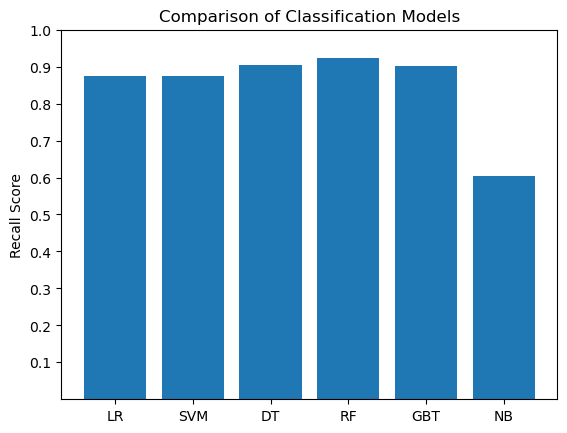

In [24]:
import matplotlib.pyplot as plt

# Define the recall scores for each model
lr_recall = 0.875
svm_recall = 0.874
dt_recall = 0.905
rf_recall = 0.923
gbt_recall = 0.902
nb_recall = 0.605

# Create a bar chart to compare recall scores
fig, ax = plt.subplots()
ax.bar(['LR','SVM','DT','RF', 'GBT', 'NB'], [lr_recall, svm_recall, dt_recall, rf_recall, gbt_recall, nb_recall])
ax.set_ylabel('Recall Score')
ax.set_title('Comparison of Classification Models')

# Set the y-axis tick values
ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

plt.show()


We can see that Random Forest Classifier performed the best and Naive Bayes performed the worst on our data set. With this we can solve the business problem of finding the dissatisfied people and then concentrate on improving the services which passengers expect inturn improving the ROI, cost cutting and establish good will inorder to stay in the competent airline business.

## Summary

Finally, we have  completed the project and have a model that can accurately classify the satisfaction of air passengers with a high recall score.Through the process, We have collected a dataset of customer reviews from various airlines and pre-processed the data by removing noise and irrelevant information and then developed multiple classification models using different techniques and calculated the recall score for each model. We have focused on improving the recall score as it is important to correctly identify dissatisfied people who may require necessary attention or support. This project has finally helped us understanding and designing a model to solve the business problems through Big Data Analytics. 